In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
raw_data = pd.read_csv('data/Dummies.csv')

In [3]:
raw_data.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [4]:
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})

In [5]:
data.tail()

,SAT,GPA,Attendance
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1
83,2050,3.81,1


In [14]:
oxa = data['SAT']
xa = sm.add_constant(oxa)
resultsAll = sm.OLS(y, xa).fit()

In [7]:
y = data.GPA
ox = data[['SAT', 'Attendance']]
x = sm.add_constant(ox)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           2.19e-15
Time:                        11:42:34   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

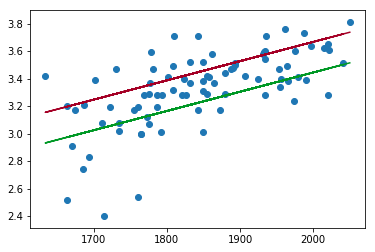

In [13]:
#0.6439  0.0014 0.2226
plt.scatter(data.SAT, y)
r = 0.6439 + 0.0014*data.SAT+0.2226*data.Attendance
yes = 0.6439 + 0.0014*data.SAT+0.2226*1
no = 0.6439 + 0.0014*data.SAT+0.2226*0
#plt.plot(data.SAT, r)
plt.plot(data.SAT, yes, c='#a50026')
plt.plot(data.SAT, no, c='#009926')

In [15]:
#resultsAll results
new_data = pd.DataFrame({'const':1, 'SAT':[1700,1680], 'Attendance':[0,1]})
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1680,1


In [16]:
new_data = new_data.rename(index={0:'Bob', 1:'Alice'})
new_data

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1680,1


In [17]:
results.predict(new_data)

Bob      3.023513
Alice    3.218161
dtype: float64

In [20]:
new_data_all = pd.DataFrame({'const':1, 'SAT':[1700,1680]})
new_data_all = new_data_all.rename(index={0:'Bob', 1:'Alice'})

In [21]:
resultsAll.predict(new_data_all)

Bob      3.089710
Alice    3.056596
dtype: float64